In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import savgol_filter
from sklearn.decomposition import PCA as pca
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.cluster import KMeans

In [2]:
url = 'https://raw.githubusercontent.com/nevernervous78/nirpyresearch/master/data/milk.csv'
data = pd.read_csv(url)
 
# The first column of the Data Frame contains the labels
lab = data.values[:,1].astype('uint8') 
 
# Read the features (scans) and transform data from reflectance to absorbance
feat = np.log(1.0/(data.values[:,2:]).astype('float32'))
 
# Calculate first derivative applying a Savitzky-Golay filter
dfeat = savgol_filter(feat, 25, polyorder = 5, deriv=1)

feat.shape

(450, 601)

601


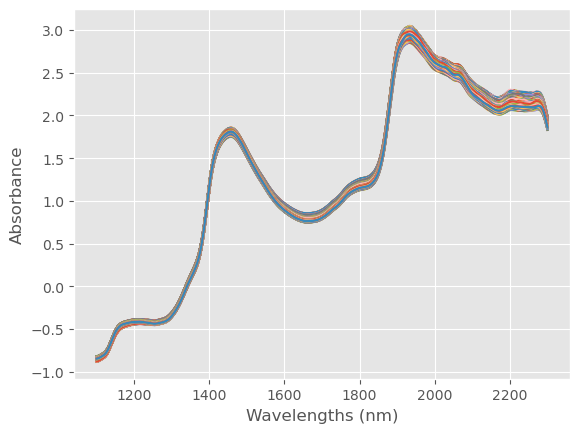

In [3]:
# Plot the data
wl = np.arange(1100, 2302, 2)
print(len(wl))
with plt.style.context('ggplot'):
    plt.plot(wl, feat.T)
    plt.xlabel("Wavelengths (nm)")
    plt.ylabel("Absorbance")
plt.show()

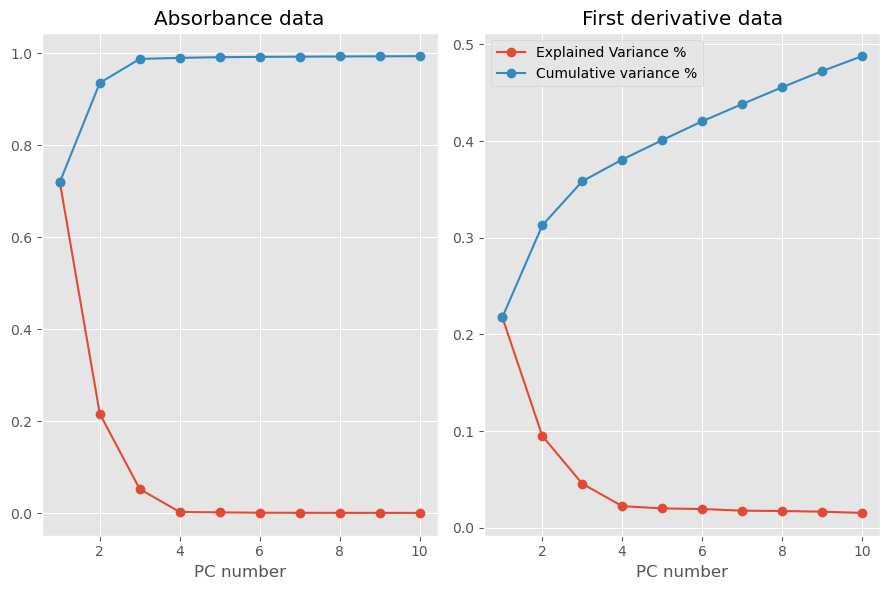

In [4]:
nc = 10
pca1 = pca(n_components=nc)
pca2 = pca(n_components=nc)
 
# Scale the features to have zero mean and standard devisation of 1
# This is important when correlating data with very different variances
nfeat1 = StandardScaler().fit_transform(feat)
nfeat2 = StandardScaler().fit_transform(dfeat)
 
# Fit the spectral data and extract the explained variance ratio
X1 = pca1.fit(nfeat1)
expl_var_1 = X1.explained_variance_ratio_
 
# Fit the first data and extract the explained variance ratio
X2 = pca2.fit(nfeat2)
expl_var_2 = X2.explained_variance_ratio_
 
# Plot data
pc_array = np.linspace(1,nc,nc)
with plt.style.context(('ggplot')):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9,6))
    fig.set_tight_layout(True)
 
    ax1.plot(pc_array, expl_var_1,'-o', label="Explained Variance %")
    ax1.plot(pc_array, np.cumsum(expl_var_1),'-o', label = 'Cumulative variance %')
    ax1.set_xlabel("PC number")
    ax1.set_title('Absorbance data')
 
    ax2.plot(pc_array, expl_var_2,'-o', label="Explained Variance %")
    ax2.plot(pc_array, np.cumsum(expl_var_2),'-o', label = 'Cumulative variance %')
    ax2.set_xlabel("PC number")
    ax2.set_title('First derivative data')
 
    plt.legend()
    plt.show()

In [5]:
 
# Transform on the scaled features
Xt2 = pca2.fit_transform(nfeat2)

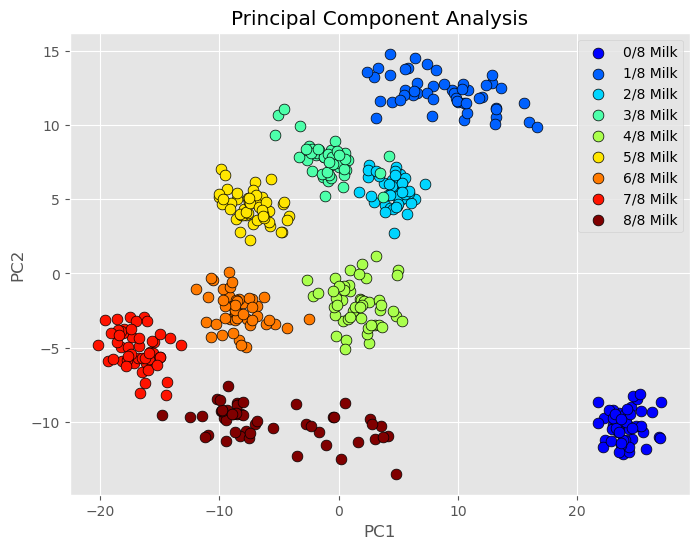

In [6]:
labplot = ["0/8 Milk","1/8 Milk","2/8 Milk", "3/8 Milk", \
"4/8 Milk", "5/8 Milk","6/8 Milk","7/8 Milk", "8/8 Milk"]
 
# Scatter plot
unique = list(set(lab))
colors = [plt.cm.jet(float(i)/max(unique)) for i in unique]
with plt.style.context(('ggplot')):
    plt.figure(figsize=(8,6))
    for i, u in enumerate(unique):
        col = np.expand_dims(np.array(colors[i]), axis=0)
        xi = [Xt2[j,0] for j in range(len(Xt2[:,0])) if lab[j] == u]
        yi = [Xt2[j,1] for j in range(len(Xt2[:,1])) if lab[j] == u]
        plt.scatter(xi, yi, c=col, s=60, edgecolors='k',label=str(u))
 
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(labplot,loc='upper right')
    plt.title('Principal Component Analysis')
    plt.show()